In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("../balancing/balancedDataset.csv")
df.drop("transactiondate", axis=1, inplace=True)
df.drop("registrationpercentage", axis=1, inplace=True)
df.head()

,vehicletype,vehiclemodel,vehicleprimaryuse,vehicleregistrationnumber,label
0,Battery Electric Vehicle (BEV),Roadster,Passenger,1,35
1,Battery Electric Vehicle (BEV),Roadster,Passenger,1,35
2,Battery Electric Vehicle (BEV),Ranger,Truck,1,13
3,Battery Electric Vehicle (BEV),Roadster,Passenger,1,35
4,Battery Electric Vehicle (BEV),Roadster,Passenger,3,35


In [3]:
columns_to_encode = ["vehicletype", "vehiclemodel", "vehicleprimaryuse"]

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,vehicletype,vehiclemodel,vehicleprimaryuse,vehicleregistrationnumber,label
0,0,67,9,1,35
1,0,67,9,1,35
2,0,66,12,1,13
3,0,67,9,1,35
4,0,67,9,3,35


In [4]:
pearson_corr = df.corr(method='pearson')
pearson_corr

,vehicletype,vehiclemodel,vehicleprimaryuse,vehicleregistrationnumber,label
vehicletype,1.000000,0.008283,0.042306,-0.157732,-0.182563
vehiclemodel,0.008283,1.000000,0.002029,0.005561,0.161168
vehicleprimaryuse,0.042306,0.002029,1.000000,0.032663,-0.012855
vehicleregistrationnumber,-0.157732,0.005561,0.032663,1.000000,0.107818
label,-0.182563,0.161168,-0.012855,0.107818,1.000000


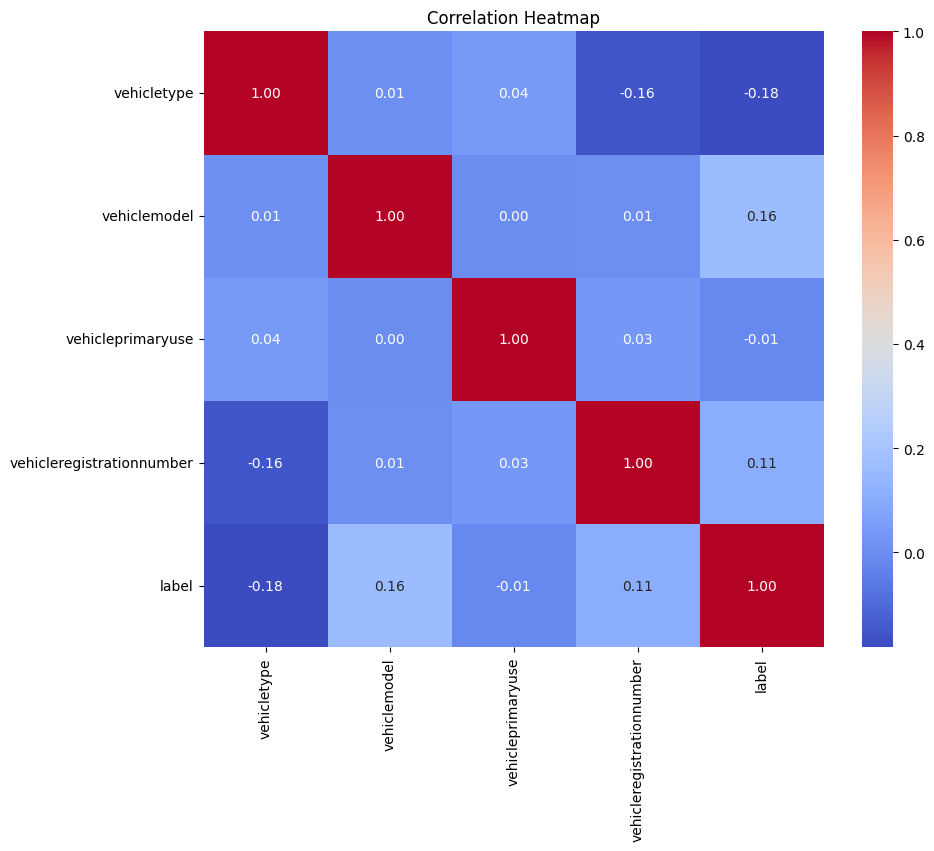

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

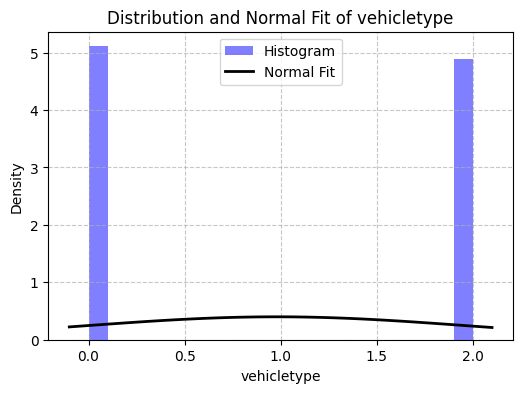

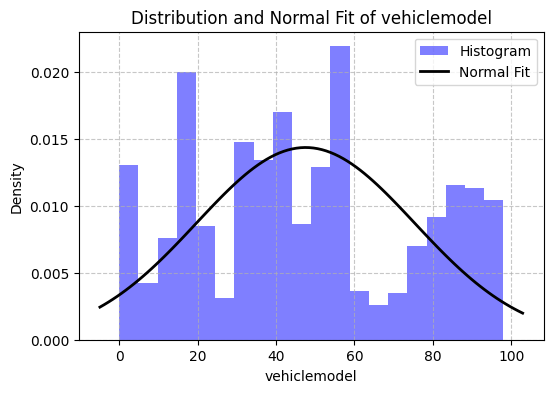

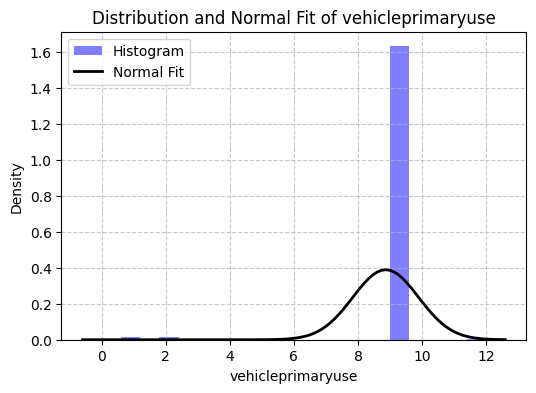

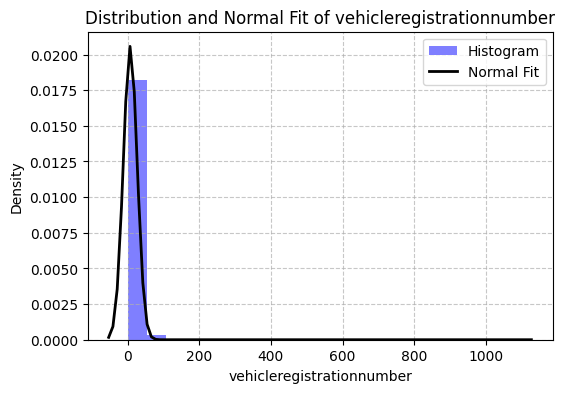

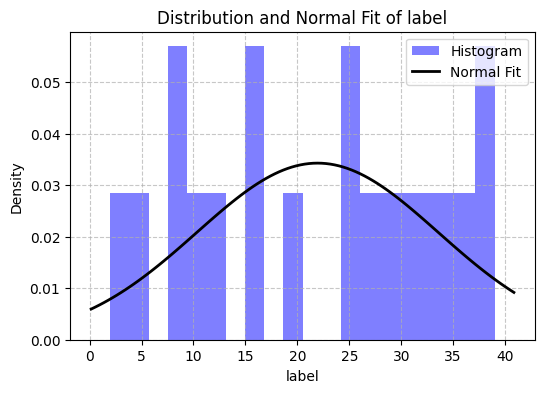

In [6]:
from scipy.stats import norm
import numpy as np

for column in df.columns:
    plt.figure(figsize=(6, 4))
    data = df[column]
    
    # Plot del histograma
    plt.hist(data, bins=20, density=True, alpha=0.5, color='blue', label='Histogram')

    # Ajuste de distribución normal
    mu, std = norm.fit(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    
    # Plot de la distribución ajustada
    plt.plot(x, p, 'k', linewidth=2, label='Normal Fit')
    
    plt.title(f'Distribution and Normal Fit of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(linestyle='--', alpha=0.7)
    plt.show()

In [7]:
df.to_csv("../datasets/correlational.csv", index=False)